# Dropout Regularization In Deep Neural Network
##### This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.

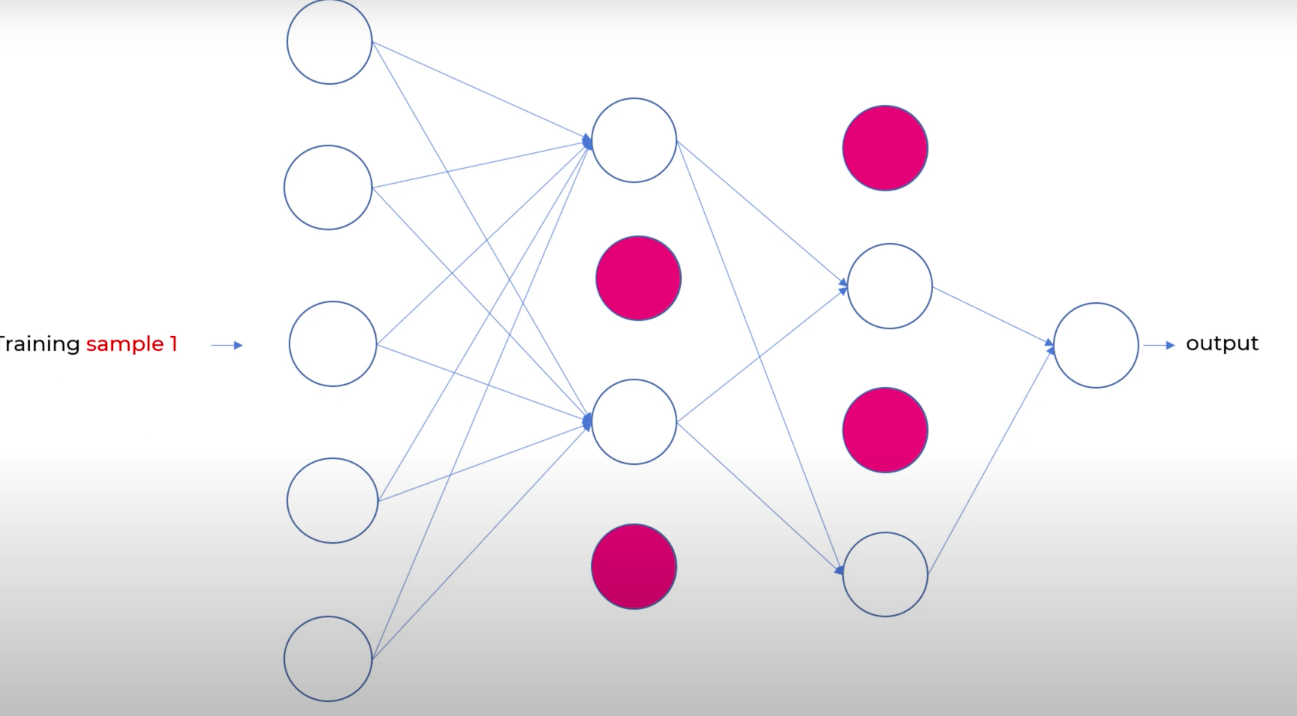

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df = pd.read_csv('/Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/Datasets/sonar_dataset.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [217]:
df.shape

(208, 61)

In [219]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [221]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [223]:
df[60] = df[60].replace({'M':1,'R':0})

In [225]:
X = df.drop(60, axis='columns')

y = df[60]


In [227]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int64

In [229]:
y.value_counts()

60
1    111
0     97
Name: count, dtype: int64

In [231]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [233]:
X_train.shape,X_test.shape

((156, 60), (52, 60))

## Using Deep Learning Model without Dropout Layer

In [237]:
import tensorflow as tf
from tensorflow import keras

In [239]:
model = keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,), activation= 'relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=50, batch_size = 8)

Epoch 1/50


/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5355 - loss: 0.7405
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5882 - loss: 0.6755
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6463 - loss: 0.6553
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6388 - loss: 0.6348
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6906 - loss: 0.5783
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7814 - loss: 0.5695
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7866 - loss: 0.5371
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8224 - loss: 0.5104
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8474 - loss: 0.4592
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8389 - loss: 0.4259
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8588 - loss: 0.3811
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8284 - loss: 0.4035


In [241]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7420 - loss: 0.7518 


[0.6691722273826599, 0.7692307829856873]

In [243]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[9.9999452e-01 3.9543721e-01 2.9423997e-02 9.9986213e-01 5.1805406e-04
 9.3639325e-03 5.6527549e-01 2.6676618e-04 9.9937946e-01 3.8424975e-04]


In [245]:
# Rounding the values to narest integers ie 0 or 1

y_pred = np.round(y_pred)
print(y_pred[:10])


[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [247]:
print(y_test[:10])

186    1
155    1
165    1
200    1
58     0
34     0
151    1
18     0
202    1
62     0
Name: 60, dtype: int64


In [249]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.76      0.81      0.79        27

    accuracy                           0.77        52
   macro avg       0.77      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



## Now trying Deep Learning Model with Dropout Layer Dropout layers

In [254]:
model_d = keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,), activation= 'relu'),
    keras.layers.Dropout(0.5),                  # it is 50% data dropout
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),                  # we can drop  20% data a/c to our need in any layer
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model_d.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

model_d.fit(X_train,y_train,epochs=50, batch_size = 8)

Epoch 1/50


/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6029 - loss: 0.6884
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5125 - loss: 0.7157
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 0.7292
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5601 - loss: 0.6746
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4449 - loss: 0.7139
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6307 - loss: 0.6676
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4932 - loss: 0.6945
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4858 - loss: 0.6826
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5054 - loss: 0.7015
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5417 - loss: 0.6812
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6149 - loss: 0.6647
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5658 - loss: 0.6717


In [256]:
# we can there is slight increase in the accuracy on the test from 0.7428 % to 0.7628% after using Dropout layer

model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7420 - loss: 0.7518


[0.6691722273826599, 0.7692307829856873]

In [258]:
y_pred = model_d.predict(X_test).reshape(-1)


# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [260]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73        25
           1       0.73      0.89      0.80        27

    accuracy                           0.77        52
   macro avg       0.78      0.76      0.76        52
weighted avg       0.78      0.77      0.77        52



In [267]:
# we can see that by using dropout layer test accuracy slighlty increased from 0.76 to 0.77